# Logistic Regression on Titanic Dataset

Now we dont just fit one straight line to separate the given data.   
Take output from linear model into non linear function like sigmoid, softmax etc   
These transform the given data into interval [0,1] if its >0.5, then it goes to one class, otherwise the other class

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Relevant:
Pclass, sex, age, subsp, parch, fare, embarked. Cabin may be useful, but we have no context.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


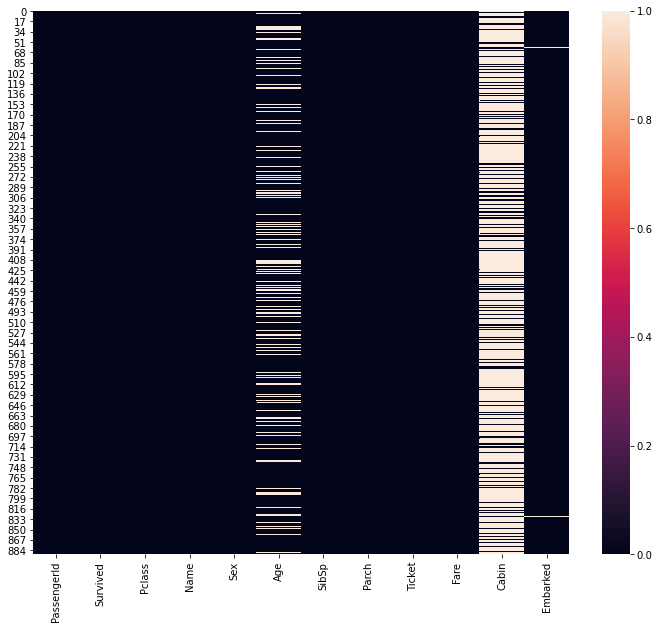

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull())

Majority of cabin is empty. Age we can process. But Cabin we drop it for sure.

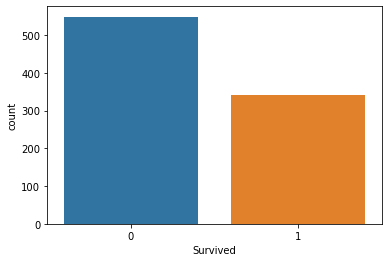

In [7]:
sns.countplot(x='Survived',data=train)

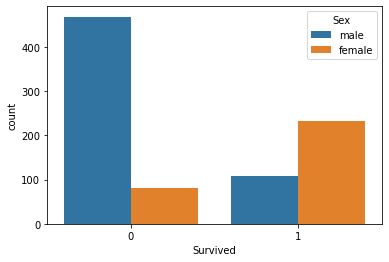

In [9]:
sns.countplot(x='Survived',data=train, hue='Sex')

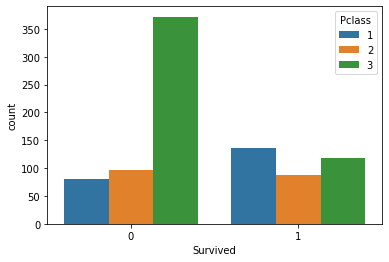

In [10]:
sns.countplot(x='Survived',data=train, hue='Pclass')

C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


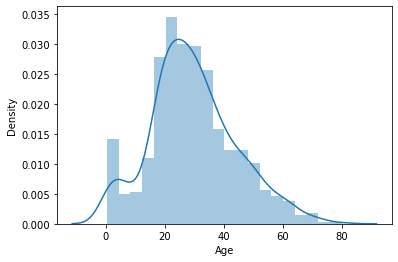

In [11]:
sns.distplot(train['Age'].dropna())

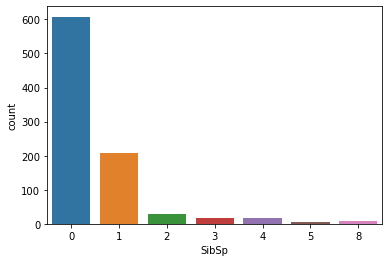

In [12]:
sns.countplot(x='SibSp', data=train)

C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


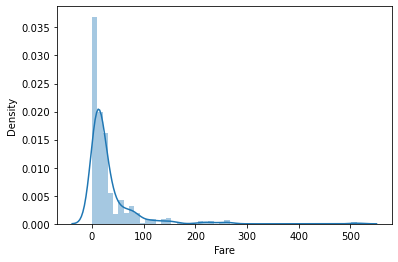

In [13]:
sns.distplot(train['Fare'])

The 0 is due to crew members.

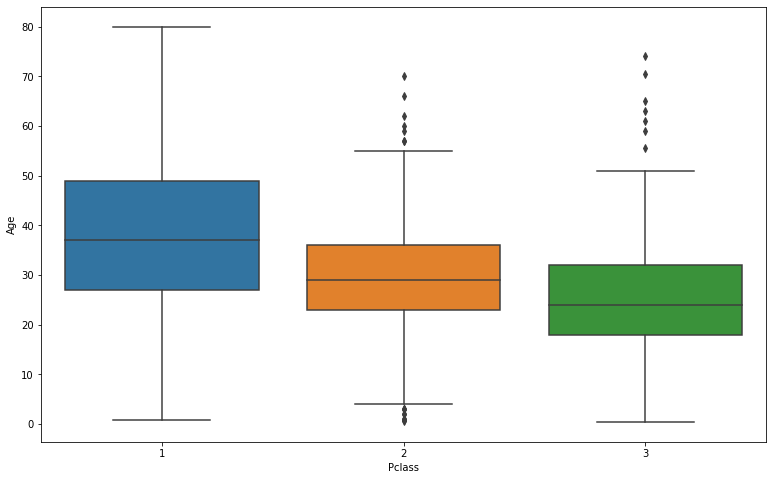

In [14]:
plt.figure(figsize=(13,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
#Estimate value from given age and class
def imputeAge(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37 #Mean value of first class
        elif pclass==2:
            return 29 #Mean value of 2nd class
        else:
            return 25 #Mean value of 3rd class
    else:
        return age

In [16]:
#Should use train.apply(imputeAge)
train['Age']=train[['Age','Pclass']].apply(imputeAge, axis=1)

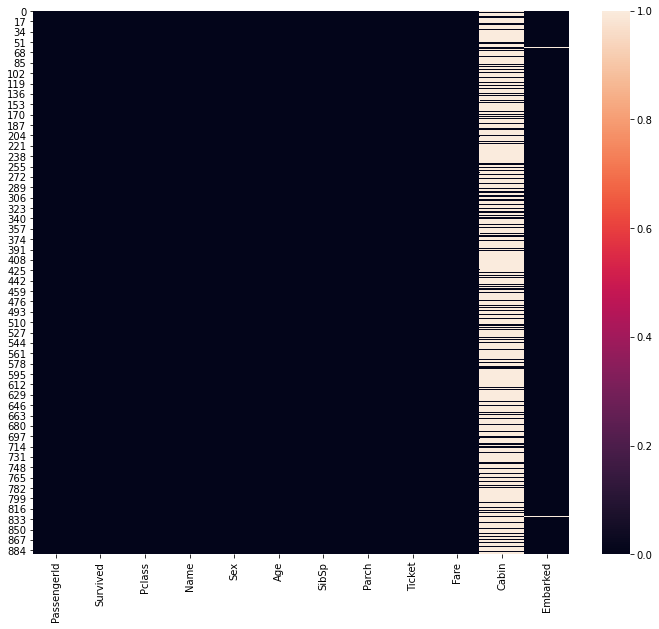

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull())

Age has no null values woooo   

Embaraked has just like 1 or 2 nulls, so lets drop it

In [18]:
train.drop('Cabin',axis=1,inplace=True)

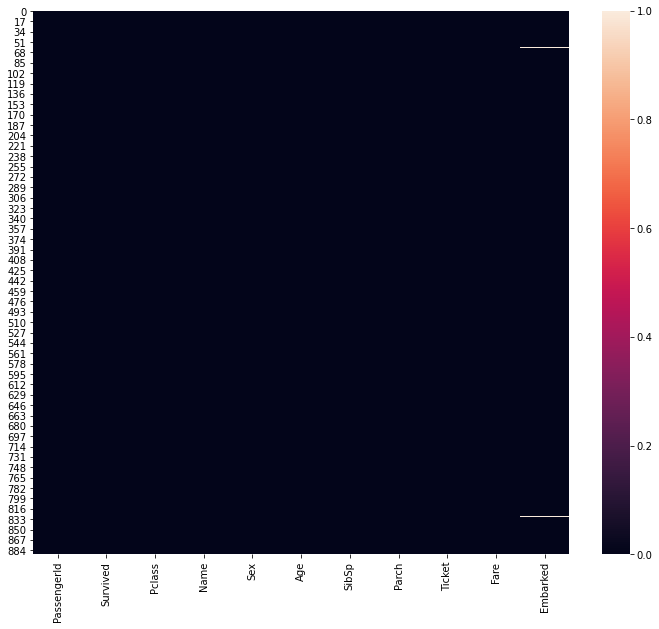

In [19]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull())

In [20]:
train.dropna(inplace=True)

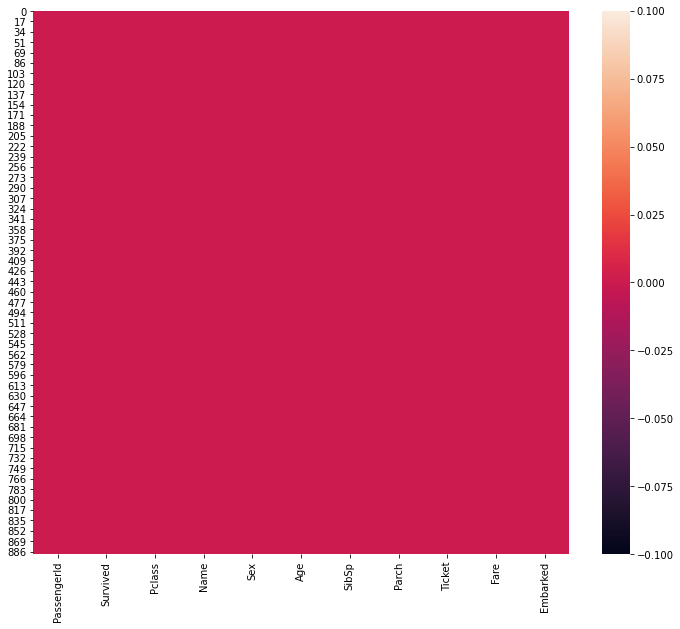

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(train.isnull())

Removed the Cabin col and dropped the Embarked nulls

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Need to fix sex and embarked to numerical

In [26]:
#Split the sex into male and female. Split the Embarked into C,Q,S
sex=pd.get_dummies(train['Sex'])
embarked=pd.get_dummies(train['Embarked'])

In [27]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [28]:
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [29]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500


In [31]:
train.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [33]:
train=pd.concat([train,sex,embarked],axis=1)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [35]:
x=train[train.columns[1:]]
y=train['Survived']

In [36]:
x

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,25.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [102]:
from sklearn.linear_model import LogisticRegression

In [113]:
model=LogisticRegression() #We will change param C

In [114]:
model.fit(xtrain,ytrain)

C:\Users\rohan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [115]:
model.coef_

array([[-1.05976934e+00, -3.90891065e-02, -2.63821958e-01,
        -6.84277246e-02,  1.52022771e-03,  2.19336448e+00,
        -3.78014209e-01,  8.89416165e-01,  6.30994282e-01,
         2.94939826e-01]])

In [116]:
pd.DataFrame(model.coef_[0], index=x.columns, columns=['Coef'])

,Coef
Pclass,-1.059769
Age,-0.039089
SibSp,-0.263822
Parch,-0.068428
Fare,0.001520
female,2.193364
male,-0.378014
C,0.889416
Q,0.630994
S,0.294940


In [117]:
preds=model.predict(xtest)

In [118]:
preds

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [120]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.68      0.76        73

    accuracy                           0.82       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.82      0.82      0.82       178



Precision: How many are actually true out of all predicted as true   
           TP/(TP+TN)   
           
Recall: How many are actually true out of all actual True   
           TP/(TP+FN)   
           
F1 Score: 2/(1/Recall + 1/Precision)
           
Imbalanced data, change the value of C?

In [121]:
print(confusion_matrix(ytest,preds))

[[96  9]
 [23 50]]


In [122]:
print(roc_auc_score(ytest,preds)) #Not done in class ;)

0.7996086105675146
